<a href="https://colab.research.google.com/github/fahminanursalma/fahminanursalma.github.io/blob/main/Header.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv

def read_csv_file(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append(row)
    return data

if __name__ == "__main__":
    file_path = "/content/Header_data_format_ID01.csv"  # Replace with the actual path to your CSV file
    csv_data = read_csv_file(file_path)

    # Display the contents of the CSV file
    for row in csv_data:
        print(row)

['Segment', 'Xmin', '  P8', ' TP8', '  T8', '  P7', ' FT8', ' TP7', '  F8', ' T7', ' FT7', '   F7', 'Trial Type', 'Accept', 'Correct', 'RT', 'Resp']
['1', '0.00001', '18.7988', '17.2043', '22.4075', '20.8969', '16.449', '18.7988', '17.1204', '17.2882', '16.6168', '19.8059', '23', '1', '0', '0', '0']
['1', '0.00002', '20.1416', '18.5471', '23.7503', '21.0648', '17.2882', '19.2184', '18.3792', '17.9596', '17.2043', '20.2255', '23', '1', '0', '0', '0']
['1', '0.00003', '20.813', '19.3024', '23.9182', '20.3934', '17.7078', '18.9667', '19.0506', '17.9596', '17.2043', '20.0577', '23', '1', '0', '0', '0']
['1', '0.00004', '20.8969', '19.4702', '22.8271', '18.7988', '17.6239', '17.9596', '19.2184', '17.3721', '16.6168', '19.3863', '23', '1', '0', '0', '0']
['1', '0.00005', '20.2255', '18.9667', '20.813', '16.3651', '16.9525', '16.3651', '18.8828', '16.1133', '15.5258', '18.2114', '23', '1', '0', '0', '0']
['1', '0.00006', '19.0506', '17.9596', '17.9596', '13.176', '15.8615', '14.0991', '18.043

In [2]:
import pandas as pd
import pandas as pd

def read_csv_file(file_path):
    return pd.read_csv(file_path)

if __name__ == "__main__":
    file_path = "/content/Header_data_format_ID01.csv"  # Replace with the actual path to your CSV file

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Print the column headers
    print(df.columns)




Index(['Segment', 'Xmin', '  P8', ' TP8', '  T8', '  P7', ' FT8', ' TP7',
       '  F8', ' T7', ' FT7', '   F7', 'Trial Type', 'Accept', 'Correct', 'RT',
       'Resp'],
      dtype='object')


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Header_data_format_ID01.csv')

# Extract the 'column1' and 'column3' columns
new_df = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

# Save the extracted columns to a new CSV file
new_df.to_csv('output.csv', index=False)


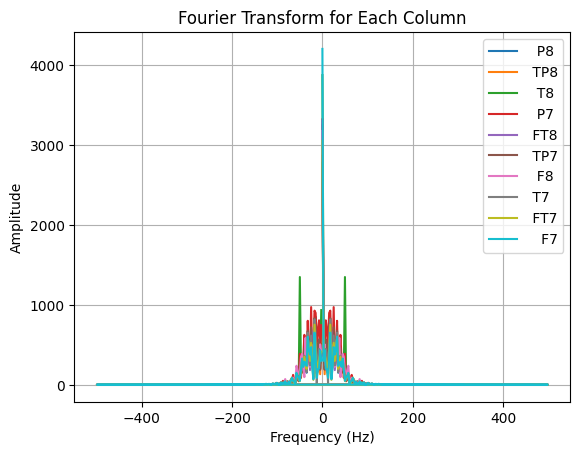

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def fourier_transform(data, sampling_rate):
    # Perform the Fourier transform
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(data)

    return frequencies, fft_values

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Select all columns
    data = df.iloc[:, 1:]

    # Perform the Fourier transform for each column
    for column in data.columns:
        frequencies, fft_values = fourier_transform(data[column], sampling_rate)

        # Plot the Fourier transform for each column
        plt.plot(frequencies, np.abs(fft_values), label=column)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform for Each Column')
    plt.legend()
    plt.grid()
    plt.show()


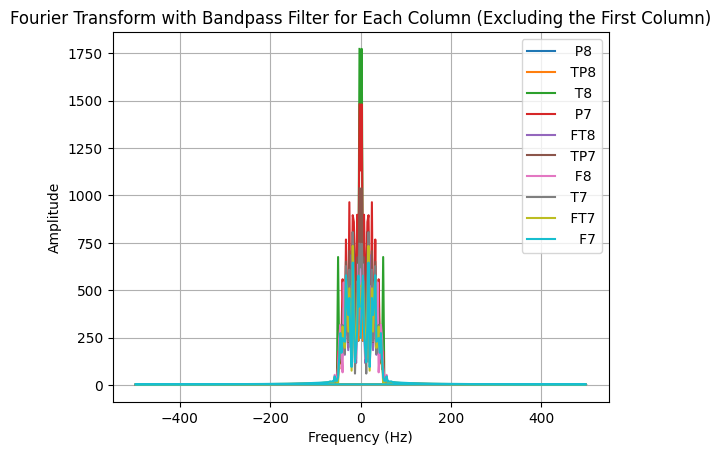

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def bandpass_filter(data, sampling_rate, lowcut, highcut, order=5):
    nyquist_freq = 0.5 * sampling_rate
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def fourier_transform(data, sampling_rate):
    # Perform the Fourier transform
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(data)

    return frequencies, fft_values

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Select all columns starting from the second column
    data = df.iloc[:, 1:]

    # Apply bandpass filter to each column
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Perform the Fourier transform on the filtered data
        frequencies, fft_values = fourier_transform(filtered_data, sampling_rate)

        # Plot the Fourier transform for each column
        plt.plot(frequencies, np.abs(fft_values), label=column)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform with Bandpass Filter for Each Column (Excluding the First Column)')
    plt.legend()
    plt.grid()
    plt.show()


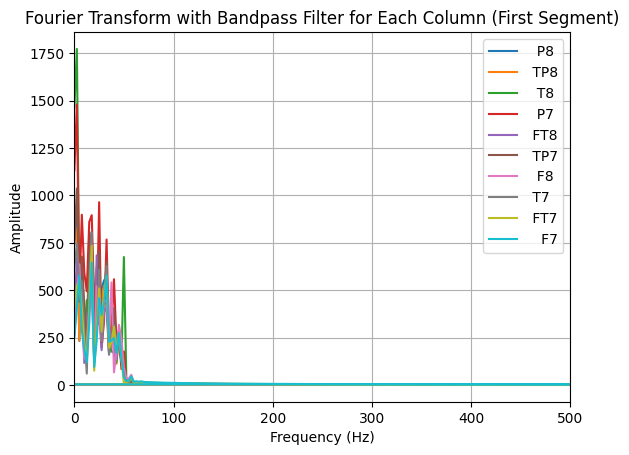

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def bandpass_filter(data, sampling_rate, lowcut, highcut, order=5):
    nyquist_freq = 0.5 * sampling_rate
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def fourier_transform(data, sampling_rate):
    # Perform the Fourier transform
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(data)

    return frequencies, fft_values

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Select all columns starting from the second column
    data = df.iloc[:, 1:]

    # Apply bandpass filter to each column
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Perform the Fourier transform on the filtered data
        frequencies, fft_values = fourier_transform(filtered_data, sampling_rate)

        # Plot the Fourier transform for each column
        plt.plot(frequencies, np.abs(fft_values), label=column)

    # Increase the bandwidth of the frequency spectrum
    plt.xlim(0, sampling_rate/2)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform with Bandpass Filter for Each Column (First Segment)')
    plt.legend()
    plt.grid()
    plt.show()


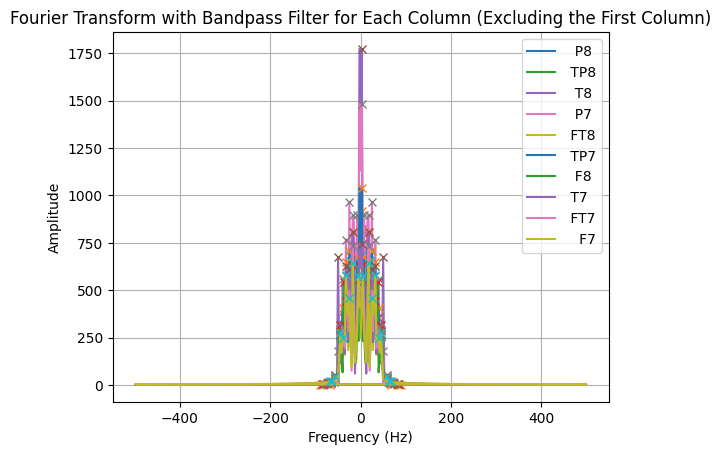

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def bandpass_filter(data, sampling_rate, lowcut, highcut, order=5):
    nyquist_freq = 0.5 * sampling_rate
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def fourier_transform(data, sampling_rate):
    # Perform the Fourier transform
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(data)

    return frequencies, fft_values

def plot_frequency_changes(data, sampling_rate, lowcut, highcut):
    # Apply bandpass filter to each column
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Perform the Fourier transform on the filtered data
        frequencies, fft_values = fourier_transform(filtered_data, sampling_rate)

        # Find peaks in the Fourier transform
        peaks, _ = find_peaks(np.abs(fft_values))

        # Plot the Fourier transform for each column
        plt.plot(frequencies, np.abs(fft_values), label=column)

        # Mark the peaks on the plot
        plt.plot(frequencies[peaks], np.abs(fft_values)[peaks], 'x')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform with Bandpass Filter for Each Column (Excluding the First Column)')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Exclude the first column and select all other columns
    data = df.iloc[:, 1:]

    # Plot frequency changes
    plot_frequency_changes(data, sampling_rate, lowcut, highcut)


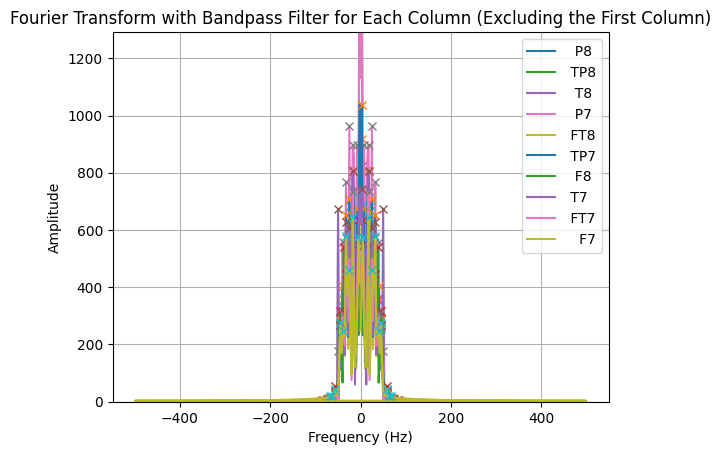

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def bandpass_filter(data, sampling_rate, lowcut, highcut, order=5):
    nyquist_freq = 0.5 * sampling_rate
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def fourier_transform(data, sampling_rate):
    # Perform the Fourier transform
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(data)

    return frequencies, fft_values

def plot_frequency_changes(data, sampling_rate, lowcut, highcut):
    # Apply bandpass filter to each column
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Perform the Fourier transform on the filtered data
        frequencies, fft_values = fourier_transform(filtered_data, sampling_rate)

        # Find peaks in the Fourier transform
        peaks, _ = find_peaks(np.abs(fft_values))

        # Plot the Fourier transform for each column
        plt.plot(frequencies, np.abs(fft_values), label=column)

        # Mark the peaks on the plot
        plt.plot(frequencies[peaks], np.abs(fft_values)[peaks], 'x')

    # Expand the y-axis range to amplify smaller amplitude components
    plt.ylim(0, 2 * np.max(np.abs(fft_values)))

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform with Bandpass Filter for Each Column (Excluding the First Column)')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Exclude the first column and select all other columns
    data = df.iloc[:, 1:]

    # Plot frequency changes with expanded y-axis range
    plot_frequency_changes(data, sampling_rate, lowcut, highcut)


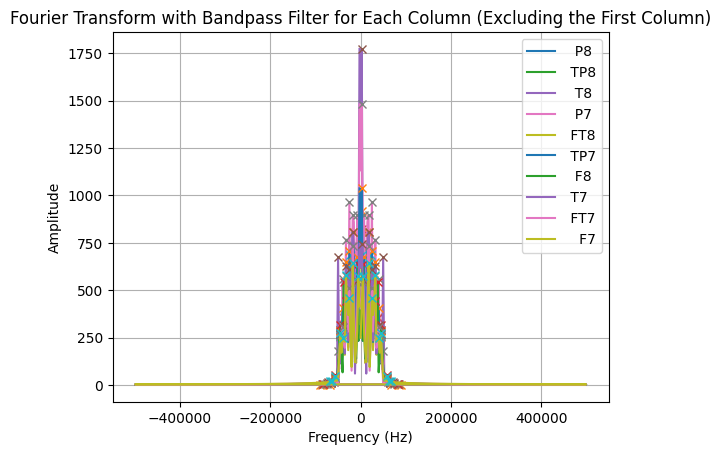

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def bandpass_filter(data, sampling_rate, lowcut, highcut, order=5):
    nyquist_freq = 0.5 * sampling_rate
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def fourier_transform(data, sampling_rate):
    # Perform the Fourier transform
    n = len(data)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(data)

    return frequencies, fft_values

def plot_frequency_changes(data, sampling_rate, lowcut, highcut):
    # Apply bandpass filter to each column
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Perform the Fourier transform on the filtered data
        frequencies, fft_values = fourier_transform(filtered_data, sampling_rate)

        # Find peaks in the Fourier transform
        peaks, _ = find_peaks(np.abs(fft_values))

        # Plot the Fourier transform for each column
        plt.plot(sampling_rate * frequencies, np.abs(fft_values), label=column)  # Convert bins to Hertz

        # Mark the peaks on the plot
        plt.plot(sampling_rate * frequencies[peaks], np.abs(fft_values)[peaks], 'x')  # Convert bins to Hertz

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Fourier Transform with Bandpass Filter for Each Column (Excluding the First Column)')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Exclude the first column and select all other columns
    data = df.iloc[:, 1:]

    # Plot frequency changes with human-readable frequency axis
    plot_frequency_changes(data, sampling_rate, lowcut, highcut)


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 1024 is greater than input length  = 401, using nperseg = 401
  warnings.warn('nperseg = {0:d} is greater than input length '


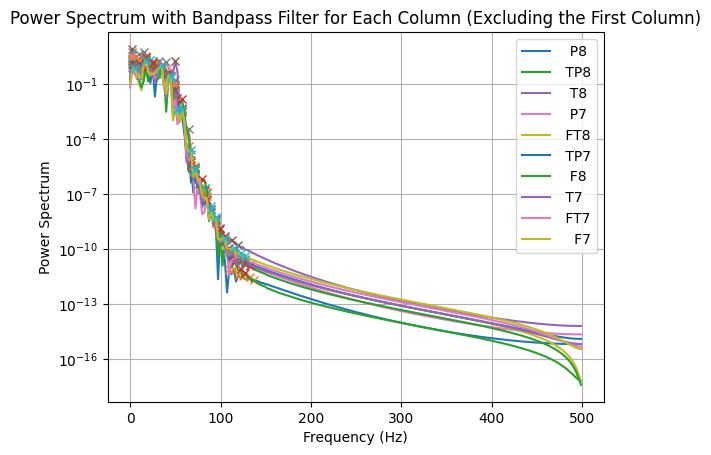

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
from scipy.signal import welch

def read_csv_file(file_path):
    return pd.read_csv(file_path)

def bandpass_filter(data, sampling_rate, lowcut, highcut, order=5):
    nyquist_freq = 0.5 * sampling_rate
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def plot_power_spectrum(data, sampling_rate, lowcut, highcut):
    # Apply bandpass filter to each column
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Compute the power spectral density (PSD)
        frequencies, power_spectrum = welch(filtered_data, fs=sampling_rate, nperseg=1024)

        # Find peaks in the power spectrum
        peaks, _ = find_peaks(power_spectrum)

        # Plot the power spectrum for each column
        plt.semilogy(frequencies, power_spectrum, label=column)

        # Mark the peaks on the plot
        plt.semilogy(frequencies[peaks], power_spectrum[peaks], 'x')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectrum')
    plt.title('Power Spectrum with Bandpass Filter for Each Column (Excluding the First Column)')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Exclude the first column and select all other columns
    data = df.iloc[:, 1:]

    # Plot power spectrum with human-readable frequency axis
    plot_power_spectrum(data, sampling_rate, lowcut, highcut)


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 1024 is greater than input length  = 401, using nperseg = 401
  warnings.warn('nperseg = {0:d} is greater than input length '


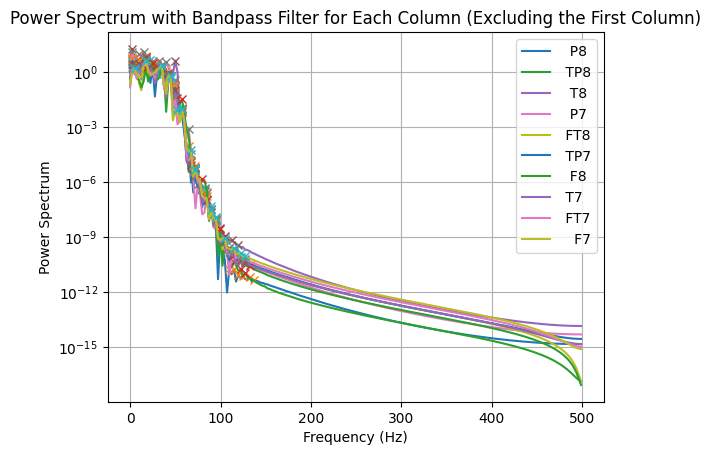

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
from scipy.signal import welch

# ... (rest of the code remains the same)

def plot_power_spectrum(data, sampling_rate, lowcut, highcut, amplitude_scaling_factor=1.5):
    # Apply bandpass filter to each column and scale the data
    for column in data.columns:
        filtered_data = bandpass_filter(data[column], sampling_rate, lowcut, highcut)

        # Increase the amplitude of the data
        scaled_data = filtered_data * amplitude_scaling_factor

        # Compute the power spectral density (PSD)
        frequencies, power_spectrum = welch(scaled_data, fs=sampling_rate, nperseg=1024)

        # Find peaks in the power spectrum
        peaks, _ = find_peaks(power_spectrum)

        # Plot the power spectrum for each column
        plt.semilogy(frequencies, power_spectrum, label=column)

        # Mark the peaks on the plot
        plt.semilogy(frequencies[peaks], power_spectrum[peaks], 'x')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectrum')
    plt.title('Power Spectrum with Bandpass Filter for Each Column (Excluding the First Column)')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    file_path = "/content/output.csv"  # Replace with the actual path to your CSV file
    sampling_rate = 1000  # Replace with the sampling rate of your data (e.g., 1000 Hz)
    lowcut = 1  # Lower cutoff frequency of the bandpass filter (in Hz)
    highcut = 50  # Upper cutoff frequency of the bandpass filter (in Hz)
    amplitude_scaling_factor = 1.5  # Replace with the desired scaling factor

    # Read the CSV file into a DataFrame
    df = read_csv_file(file_path)

    # Exclude the first column and select all other columns
    data = df.iloc[:, 1:]

    # Plot power spectrum with increased amplitude
    plot_power_spectrum(data, sampling_rate, lowcut, highcut, amplitude_scaling_factor)


In [12]:
import numpy as np
from scipy.fft import fft

def detect_eeg_bands(eeg_data, sampling_rate):
    # Compute the FFT of the EEG data
    n = len(eeg_data)
    fft_data = fft(eeg_data)

    # Calculate the corresponding frequency values
    freqs = np.fft.fftfreq(n, 1 / sampling_rate)

    # Define frequency bands (in Hz)
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 100)
    }

    # Initialize power values for each frequency band
    power_bands = {band: 0 for band in bands}

    # Calculate power in each frequency band
    for band, (low, high) in bands.items():
        indices = np.logical_and(freqs >= low, freqs < high)
        power_bands[band] = np.sum(np.abs(fft_data[indices])**2) / n

    return power_bands

# Example usage
if __name__ == "__main__":
    # Sample EEG data from CSV file (replace with your actual file path)
    eeg_data_file = "/content/Header_data_format_ID01.csv"

    # Load EEG data from CSV file (assuming the data is in the first column)
    eeg_data = np.genfromtxt(eeg_data_file, delimiter=',', skip_header=1, usecols=(0))

    # Sampling rate of the EEG data (replace with the actual sampling rate)
    sampling_rate = 1000

    # Detect EEG bands
    power_bands = detect_eeg_bands(eeg_data, sampling_rate)
    print("EEG Power Bands:")
    for band, power in power_bands.items():
        print(f"{band}: {power:.2f}")


EEG Power Bands:
delta: 0.00
theta: 0.00
alpha: 0.00
beta: 0.00
gamma: 0.00


In [13]:
import numpy as np
from scipy.signal import butter, lfilter
from scipy.fft import fft

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def compute_eeg_bands(eeg_data, sampling_rate):
    # Define frequency bands (in Hz)
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 100)
    }

    num_channels, num_samples = eeg_data.shape
    freqs = np.fft.fftfreq(num_samples, 1 / sampling_rate)

    # Initialize power values for each channel and frequency band
    power_bands = {band: np.zeros((num_channels,)) for band in bands}

    # Compute power in each frequency band for each channel
    for channel in range(num_channels):
        for band, (low, high) in bands.items():
            # Filter the EEG data in the desired band
            filtered_data = butter_bandpass_filter(eeg_data[channel], low, high, sampling_rate)
            # Compute FFT of the filtered data
            fft_data = fft(filtered_data)
            # Calculate power in the band
            power_bands[band][channel] = np.sum(np.abs(fft_data)**2) / num_samples

    return power_bands

# Example usage
if __name__ == "__main__":
    # Sample EEG data (replace with your actual EEG data)
    num_channels = 32
    num_samples = 14436
    sampling_rate = 1000
    eeg_data = np.random.rand(num_channels, num_samples)

    # Compute EEG bands
    power_bands = compute_eeg_bands(eeg_data, sampling_rate)

    # Print the results
    for band, power_values in power_bands.items():
        print(f"{band} power for each channel:")
        print(power_values)


delta power for each channel:
[36.63944636 31.08340662 37.4358035  33.0624165  34.27811169 32.51133237
 32.88773327 36.20155307 35.55358624 36.45321483 36.5694422  33.45042662
 33.29189402 32.02353411 29.21126192 31.541627   31.72912599 30.94430794
 32.25272908 31.48852572 33.88233642 35.41930333 34.43231636 29.72703446
 33.32056048 38.67118538 33.8090304  34.90872129 37.27250663 33.10750126
 35.58853518 33.81912798]
theta power for each channel:
[12.88296376 12.80868423 11.65093506 11.63657649 13.02111049 10.33645147
 11.70143539 14.35133194  9.95191222 12.69593591 12.66944075 14.17735321
 10.57299769 14.39392923 10.76483286  9.3625839  11.95681023 13.73818248
 12.92795704 12.49840521 14.04208933 12.45335428 11.31856683 11.73529556
 12.92555373 12.41285279 12.86371291 14.89565253 13.91825024 12.71842648
 13.45582832 13.95137101]
alpha power for each channel:
[14.14346028 15.12201486 12.7882279  12.61145873 16.09278324 14.55936552
 12.20332731 13.68053876 14.79579676 11.28749256 14.173

In [15]:
import pandas as pd

# Assuming your data is in a CSV file named 'eeg_data.csv' with a header row
data_file = '/content/output_ID1.csv'

# Read the data from the CSV file using pandas
df = pd.read_csv(data_file)

# Extract the header (channel names)
channel_names = df.columns.tolist()

# Display the channel names and their respective data
for channel in channel_names:
    channel_data = df[channel].values
    print(f"Channel {channel} Data: {channel_data}")


Channel Segment Data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 

In [16]:
import numpy as np

# Assuming you have your EEG data as a list of lists or a list of arrays
# Example EEG data: 3 channels with 5 data points each
P8 = [18.7988,20.1416,20.813,20.8969,20.2255]
TP8= [17.2043,18.5471,19.3024,19.4702,18.9667]
T8=[22.4075,23.7503,23.9182,22.8271,20.813]
P7=[20.8969,21.0648,20.3934,18.7988,16.3651]
FT8=[16.449,17.2882,17.7078,17.6239,16.9525]
TP7=[18.7988,19.2184,18.9667,17.9596,16.3651]
F8=[17.1204,18.3792,19.0506,19.2184,18.8828]
T7=[17.2882,17.9596,17.9596,17.3721,16.1133]
FT7=[16.6168,17.2043,17.2043,16.6168,15.5258]
F7=[19.8059,20.2255,20.0577,19.3863,18.2114]


# Combine the channels into a list of lists
eeg_data = [P8, TP8, T8,P7,FT8,TP7,F8,T7,FT7,F7]

# Convert the EEG data to a NumPy array
fft1 = np.array(eeg_data)

# Now you have a 2D NumPy array where each row represents a channel and each column represents a data point for that channel
# You can access individual elements or perform operations on the array as needed


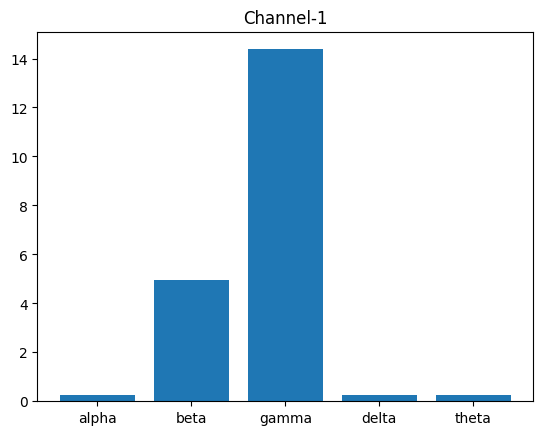

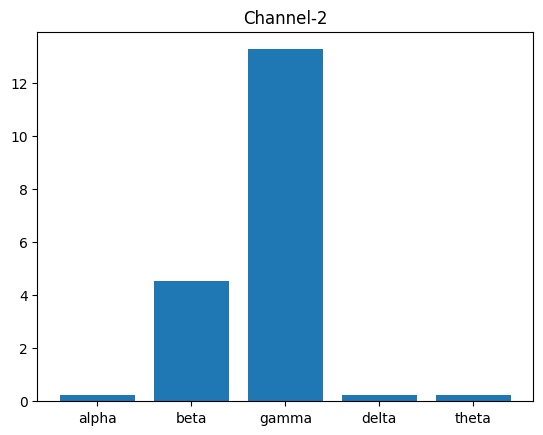

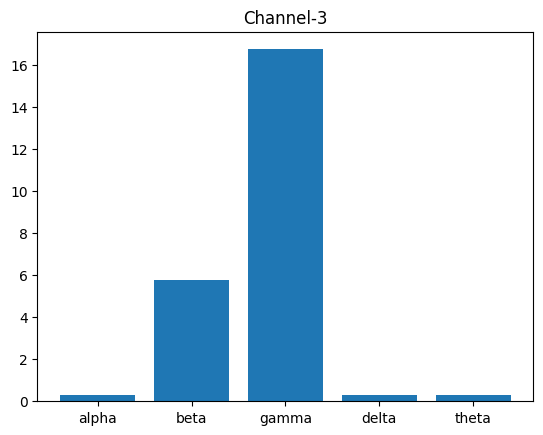

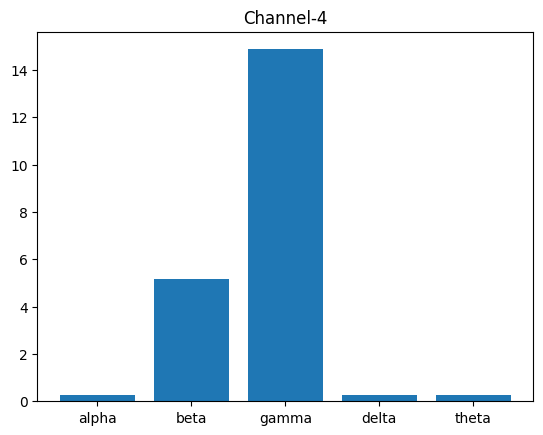

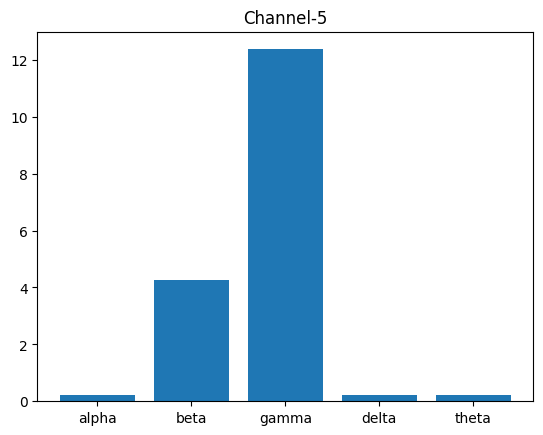

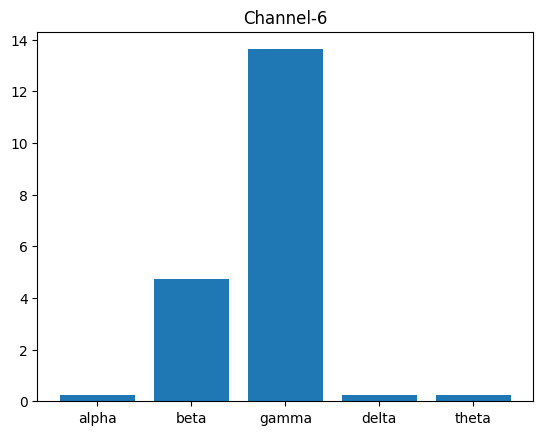

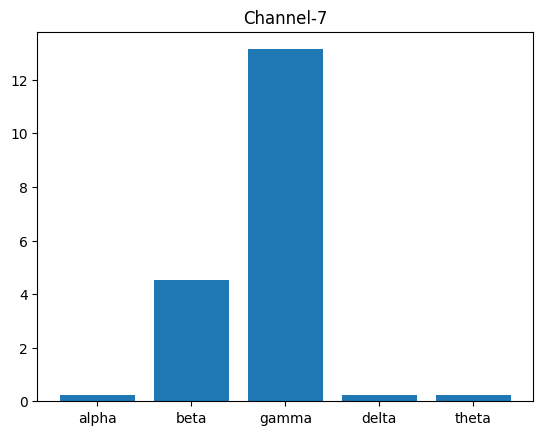

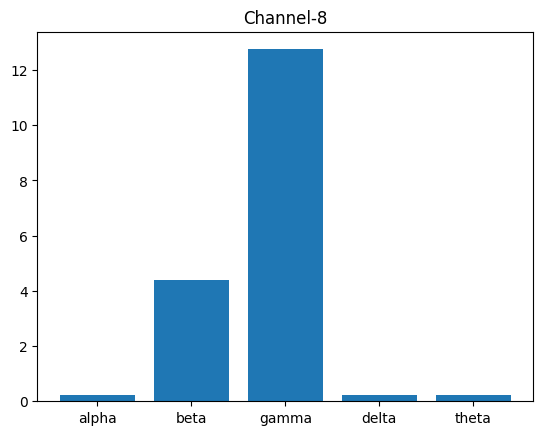

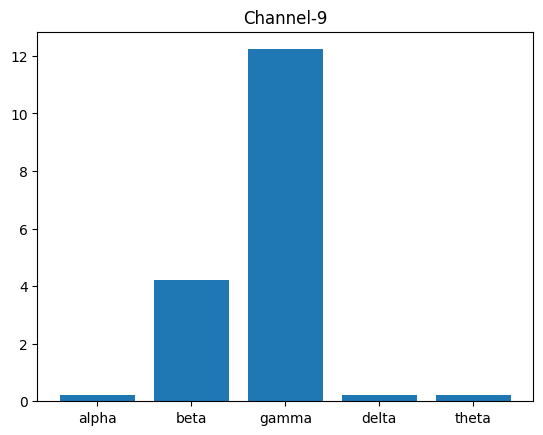

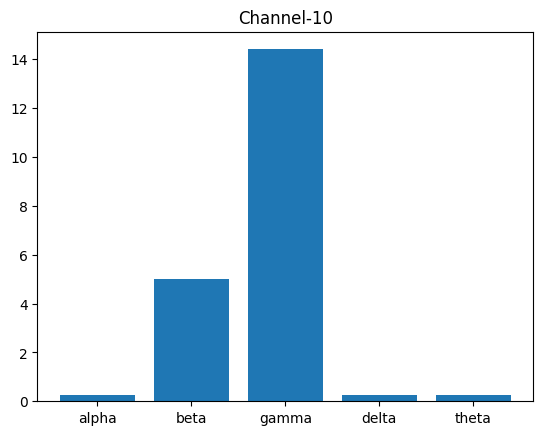

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.fft import fft

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Sample EEG data (replace this with your actual EEG data)
n = 10  # Number of EEG channels
num_samples = 14436  # Number of data points per channel
sampling_rate = 1000  # Sampling rate in Hz

# Assuming you have your EEG data stored in the variable fft1 with shape (n, num_samples)
P8 = [18.7988,20.1416,20.813,20.8969,20.2255]
TP8= [17.2043,18.5471,19.3024,19.4702,18.9667]
T8=[22.4075,23.7503,23.9182,22.8271,20.813]
P7=[20.8969,21.0648,20.3934,18.7988,16.3651]
FT8=[16.449,17.2882,17.7078,17.6239,16.9525]
TP7=[18.7988,19.2184,18.9667,17.9596,16.3651]
F8=[17.1204,18.3792,19.0506,19.2184,18.8828]
T7=[17.2882,17.9596,17.9596,17.3721,16.1133]
FT7=[16.6168,17.2043,17.2043,16.6168,15.5258]
F7=[19.8059,20.2255,20.0577,19.3863,18.2114]


# Combine the channels into a list of lists
eeg_data = [P8, TP8, T8,P7,FT8,TP7,F8,T7,FT7,F7]

# Convert the EEG data to a NumPy array
fft1 = np.array(eeg_data)

# Initialize an empty dictionary to store the power bands for each channel
power_bands_by_channel = {}

# Compute EEG bands for each channel
for i in range(n):
    alpha1 = butter_bandpass_filter(fft1[i, :], 8.1, 12.0, sampling_rate)
    beta1 = butter_bandpass_filter(fft1[i, :], 16.0, 36.0, sampling_rate)
    gamma1 = butter_bandpass_filter(fft1[i, :], 36.1, 80, sampling_rate)
    delta1 = butter_bandpass_filter(fft1[i, :], 0.1, 4.0, sampling_rate)
    #sigma1 = butter_bandpass_filter(fft1[i, :], 12.1, 16.0, sampling_rate)
    theta1 = butter_bandpass_filter(fft1[i, :], 4.1, 8.0, sampling_rate)

    sumalpha1 = sum(abs(alpha1))
    sumbeta1 = sum(abs(beta1))
    sumgamma1 = sum(abs(gamma1))
    sumdelta1 = sum(abs(delta1))
    #sumsigma1 = sum(abs(sigma1))
    sumtheta1 = sum(abs(theta1))

    # Store the power bands for the current channel in the dictionary
    power_bands_by_channel[f'Channel-{i+1}'] = [sumalpha1, sumbeta1, sumgamma1, sumdelta1, sumtheta1]

# Create bar plots for each channel
for channel, power_bands in power_bands_by_channel.items():
    N = len(power_bands)
    ra = range(N)
    plt.title(channel)
    plt.autoscale
    somestuffneeded = np.arange(N)
    ticks = ['alpha', 'beta', 'gamma', 'delta', 'theta']
    plt.xticks(somestuffneeded, ticks)
    plt.bar(ra, power_bands)
    plt.show()


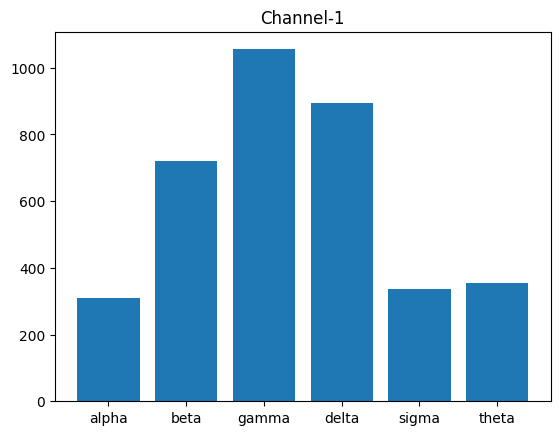

Channel--1: Maximum power in gamma band


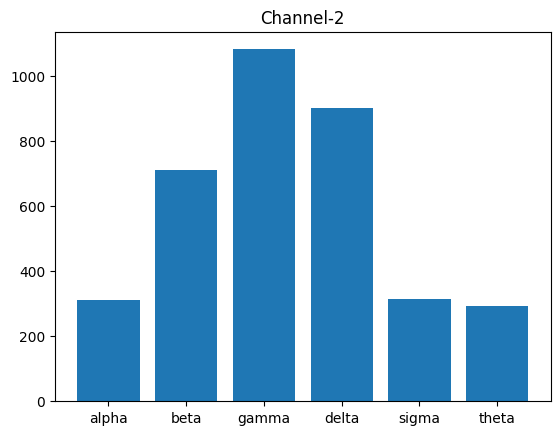

Channel--2: Maximum power in gamma band


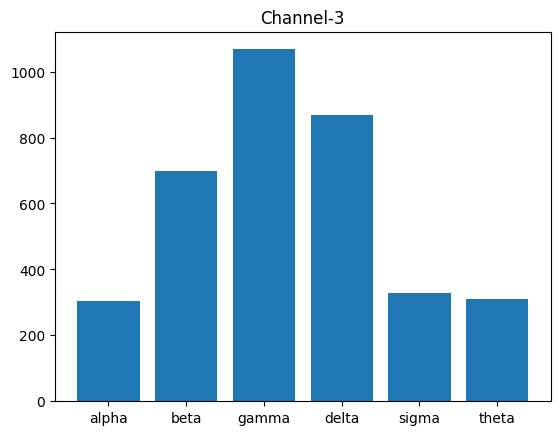

Channel--3: Maximum power in gamma band


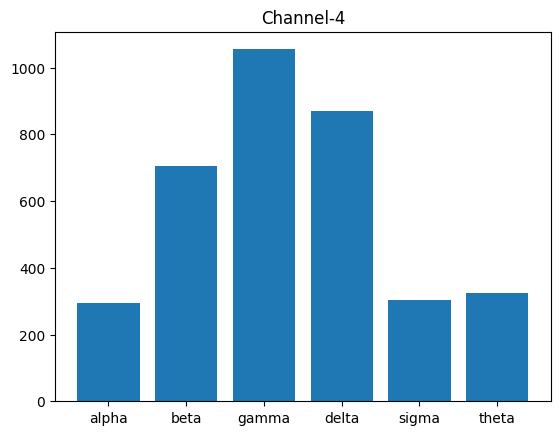

Channel--4: Maximum power in gamma band


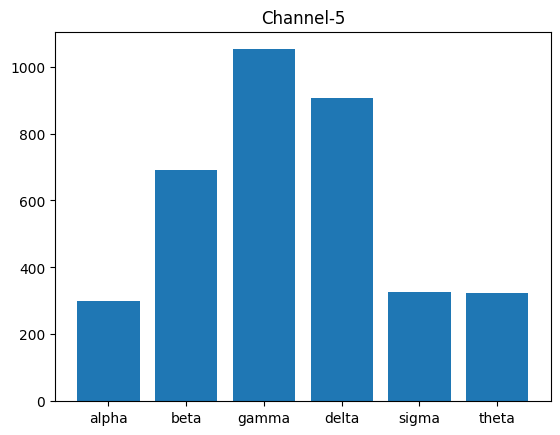

Channel--5: Maximum power in gamma band


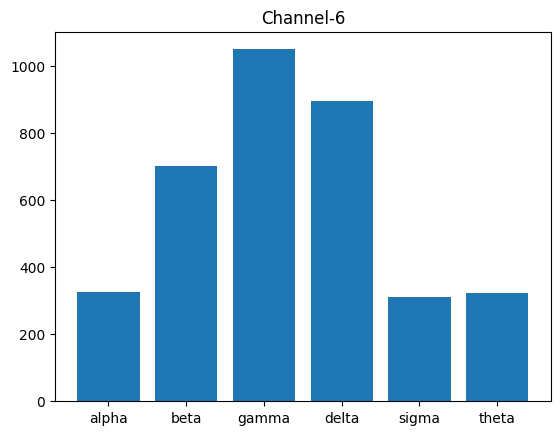

Channel--6: Maximum power in gamma band


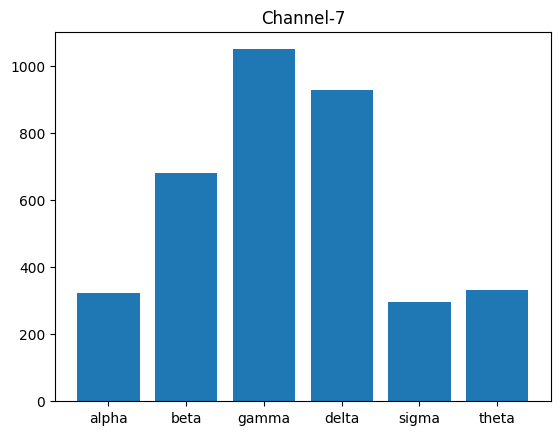

Channel--7: Maximum power in gamma band


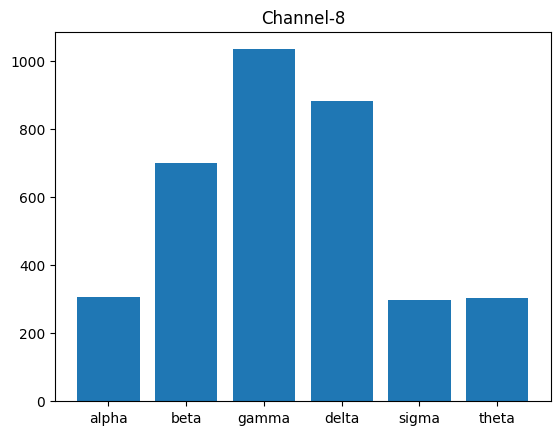

Channel--8: Maximum power in gamma band


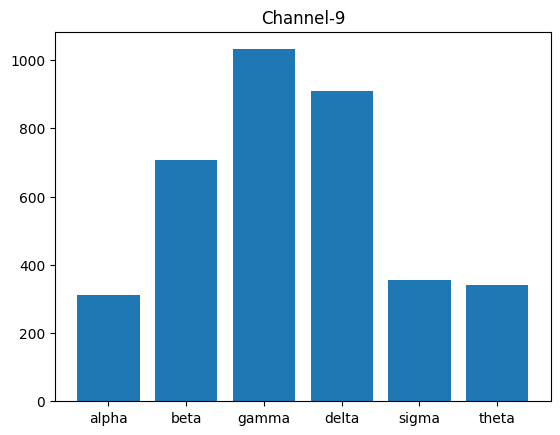

Channel--9: Maximum power in gamma band


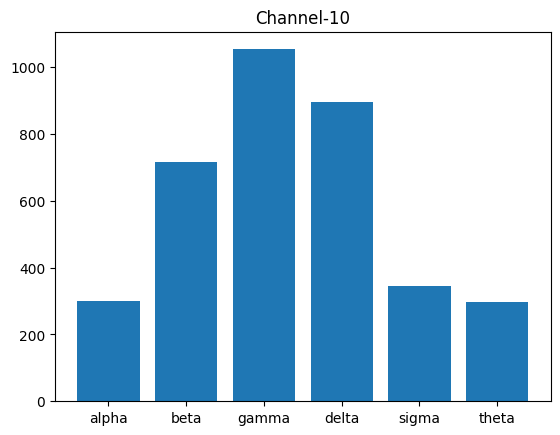

Channel-10: Maximum power in gamma band


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Assuming you have your actual EEG data in a variable called my_eeg_data
# Replace the following line with your actual EEG data
my_eeg_data = np.random.rand(14436, 10)

# Save EEG data to a CSV file with header
data_file = '/content/output_ID1.csv'  # Replace with the desired file name
df = pd.DataFrame(my_eeg_data, columns=[f'Channel-{i+1}' for i in range(my_eeg_data.shape[1])])
df.to_csv(data_file, index=False)

# Read the EEG data from the CSV file
df = pd.read_csv(data_file)

# Convert DataFrame to a NumPy array
eeg_data = df.values

# Sampling rate in Hz
sampling_rate = 1000

# Initialize an empty dictionary to store the power bands for each channel
power_bands_by_channel = {}

# Compute EEG bands for each channel
for i in range(10):
    alpha1 = butter_bandpass_filter(eeg_data[:, i], 8.1, 12.0, sampling_rate)
    beta1 = butter_bandpass_filter(eeg_data[:, i], 16.0, 36.0, sampling_rate)
    gamma1 = butter_bandpass_filter(eeg_data[:, i], 36.1, 80, sampling_rate)
    delta1 = butter_bandpass_filter(eeg_data[:, i], 0.1, 4.0, sampling_rate)  # Change 0.0 to 0.1
    sigma1 = butter_bandpass_filter(eeg_data[:, i], 12.1, 16.0, sampling_rate)
    theta1 = butter_bandpass_filter(eeg_data[:, i], 4.1, 8.0, sampling_rate)

    sumalpha1 = sum(abs(alpha1))
    sumbeta1 = sum(abs(beta1))
    sumgamma1 = sum(abs(gamma1))
    sumdelta1 = sum(abs(delta1))
    sumsigma1 = sum(abs(sigma1))
    sumtheta1 = sum(abs(theta1))

    # Store the power bands for the current channel in the dictionary
    power_bands_by_channel[f'Channel-{i+1}'] = [sumalpha1, sumbeta1, sumgamma1, sumdelta1, sumsigma1, sumtheta1]

# Create bar plots for each channel
for channel, power_bands in power_bands_by_channel.items():
    N = len(power_bands)
    ra = range(N)
    plt.title(channel)
    plt.autoscale
    somestuffneeded = np.arange(N)
    ticks = ['alpha', 'beta', 'gamma', 'delta', 'sigma', 'theta']
    plt.xticks(somestuffneeded, ticks)
    plt.bar(ra, power_bands)
    plt.show()

    # Find the frequency band with the maximum power for this channel
    max_power_band = ticks[np.argmax(power_bands)]
    print(f"Channel-{channel[-2:]}: Maximum power in {max_power_band} band")


In [19]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 1: First 1000 data points (1 second) for a specific channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment1 = my_eeg_data[:data_points_per_second, channel_index]

# Compute alpha1 for segment 1 (you can change the frequency range as needed)
alpha1 = butter_bandpass_filter(segment1, 8.1, 12.0, sampling_rate)

# Calculate the sum of absolute values of alpha1
sum_alpha1 = np.sum(np.abs(alpha1))

print("Alpha1 value for segment 1 of channel", channel_index+1, ":", sum_alpha1)


Alpha1 value for segment 1 of channel 1 : 31.993789747728677


In [20]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 1: First 1000 data points (1 second) for a specific channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment1 = my_eeg_data[:data_points_per_second, channel_index]

# Compute Beta1 for segment 1 (you can change the frequency range as needed)
beta1 = butter_bandpass_filter(segment1, 16.0, 36.0, sampling_rate)

# Calculate the sum of absolute values of Beta1
sum_beta1 = np.sum(np.abs(beta1))

print("Beta1 value for segment 1 of channel", channel_index+1, ":", sum_beta1)


Beta1 value for segment 1 of channel 1 : 58.56978679568869


In [21]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 1: First 1000 data points (1 second) for a specific channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment1 = my_eeg_data[:data_points_per_second, channel_index]

# Compute Gamma1 for segment 1 (you can change the frequency range as needed)
gamma1 = butter_bandpass_filter(segment1, 36.1, 80, sampling_rate)

# Calculate the sum of absolute values of Gamma1
sum_gamma1 = np.sum(np.abs(gamma1))

print("Gamma1 value for segment 1 of channel", channel_index+1, ":", sum_gamma1)


Gamma1 value for segment 1 of channel 1 : 78.71037226531774


In [22]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 1: First 1000 data points (1 second) for a specific channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment1 = my_eeg_data[:data_points_per_second, channel_index]

# Compute Delta1 for segment 1 (you can change the frequency range as needed)
delta1 = butter_bandpass_filter(segment1, 0.1, 4.0, sampling_rate)

# Calculate the sum of absolute values of Delta1
sum_delta1 = np.sum(np.abs(delta1))

print("Delta1 value for segment 1 of channel", channel_index+1, ":", sum_delta1)


Delta1 value for segment 1 of channel 1 : 302.9401977243489


In [23]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 1: First 1000 data points (1 second) for a specific channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment1 = my_eeg_data[:data_points_per_second, channel_index]

# Compute Theta1 for segment 1 (you can change the frequency range as needed)
theta1 = butter_bandpass_filter(segment1, 4.1, 8.0, sampling_rate)

# Calculate the sum of absolute values of Theta1
sum_theta1 = np.sum(np.abs(theta1))

print("Theta1 value for segment 1 of channel", channel_index+1, ":", sum_theta1)


Theta1 value for segment 1 of channel 1 : 40.2144309734938


In [24]:
!pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512709 sha256=f8d917b35c42d14baef032a2eb56a8f5d2febcf0679c5e033e99768a56734353
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [25]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 1: First 1000 data points (1 second) for a specific channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment1 = my_eeg_data[:data_points_per_second, channel_index]

# Segment 2: Next 1000 data points (second second) for the same channel (channel_index)
segment2 = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

# Compute Theta1 for segment 1 and segment 2
theta1_segment1 = butter_bandpass_filter(segment1, 4.1, 8.0, sampling_rate)
theta1_segment2 = butter_bandpass_filter(segment2, 4.1, 8.0, sampling_rate)

# Calculate the sum of absolute values of Theta1 for both segments
sum_theta1_segment1 = np.sum(np.abs(theta1_segment1))
sum_theta1_segment2 = np.sum(np.abs(theta1_segment2))

print("Theta1 value for segment 1 of channel", channel_index+1, ":", sum_theta1_segment1)
print("Theta1 value for segment 2 of channel", channel_index+1, ":", sum_theta1_segment2)

# Calculate the DTW distance between segment1 and segment2
distance, path = fastdtw(theta1_segment1, theta1_segment2)

print("DTW Distance between segment1 and segment2:", distance)


Theta1 value for segment 1 of channel 1 : 40.2144309734938
Theta1 value for segment 2 of channel 1 : 30.06541228714459
DTW Distance between segment1 and segment2: 14.72706513634742


In [26]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1]

# Define frequency bands
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(num_channels):
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[f'Channel-{channel_index+1}'] = features

# Print the extracted features for each channel
for channel, features in channel_features.items():
    print(f"Channel: {channel}")
    for feature, value in features.items():
        print(f"{feature}: {value}")
    print()


Channel: Channel-1
delta_mean: -0.0004299168789104369
delta_std: 0.04862833758747837
delta_max: 0.37574123626635453
delta_min: -0.13184815935314695
delta_kurtosis: 20.375220298500405
delta_skew: 2.9228037050922144
theta_mean: 8.143898572995678e-05
theta_std: 0.031528056987512515
theta_max: 0.12657346986425683
theta_min: -0.16803534826811095
theta_kurtosis: 1.6464468745888325
theta_skew: -0.15688624333015075
alpha_mean: 2.0617165565091943e-05
alpha_std: 0.03080072568927952
alpha_max: 0.10430818321377679
alpha_min: -0.13320230493689234
alpha_kurtosis: 0.2592241983557777
alpha_skew: -0.04003176153459465
beta_mean: -3.474608146098224e-05
beta_std: 0.058869889723742914
beta_max: 0.27175616717867607
beta_min: -0.23918417070088271
beta_kurtosis: 0.06597056357994191
beta_skew: 0.047447968755273136
gamma_mean: 3.931420918030577e-05
gamma_std: 0.11369351599181453
gamma_max: 0.4250732995422073
gamma_min: -0.40051205410061247
gamma_kurtosis: -0.1233694628353339
gamma_skew: -0.006839108158375316
de

In [27]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Define the frequency range for alpha1
alpha_lowcut = 8.1
alpha_highcut = 12.0

# List to store alpha1 values for each channel
alpha1_values = []

# Loop through each channel and compute alpha1 value
for channel_index in range(10):
    segment = my_eeg_data[:data_points_per_second, channel_index]
    alpha1 = butter_bandpass_filter(segment, alpha_lowcut, alpha_highcut, sampling_rate)
    sum_alpha1 = np.sum(np.abs(alpha1))
    alpha1_values.append(sum_alpha1)
    print("Alpha1 value for segment 1 of channel", channel_index+1, ":", sum_alpha1)

# Alternatively, if you want to store the alpha1 values in a dictionary with channel indices as keys
alpha1_dict = {f"Channel-{channel_index+1}": alpha1_values[channel_index] for channel_index in range(10)}

print(alpha1_dict)


Alpha1 value for segment 1 of channel 1 : 31.993789747728677
Alpha1 value for segment 1 of channel 2 : 26.815526927885585
Alpha1 value for segment 1 of channel 3 : 17.622283547948808
Alpha1 value for segment 1 of channel 4 : 16.466013082719396
Alpha1 value for segment 1 of channel 5 : 16.891703424297916
Alpha1 value for segment 1 of channel 6 : 23.849639746487757
Alpha1 value for segment 1 of channel 7 : 28.47471966475885
Alpha1 value for segment 1 of channel 8 : 30.12248581173429
Alpha1 value for segment 1 of channel 9 : 36.01488395583054
Alpha1 value for segment 1 of channel 10 : 20.411013939490534
{'Channel-1': 31.993789747728677, 'Channel-2': 26.815526927885585, 'Channel-3': 17.622283547948808, 'Channel-4': 16.466013082719396, 'Channel-5': 16.891703424297916, 'Channel-6': 23.849639746487757, 'Channel-7': 28.47471966475885, 'Channel-8': 30.12248581173429, 'Channel-9': 36.01488395583054, 'Channel-10': 20.411013939490534}


In [28]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Define the frequency range for beta1
beta_lowcut = 16.0
beta_highcut = 36.0

# List to store beta1 values for each channel
beta1_values = []

# Loop through each channel and compute beta1 value
for channel_index in range(10):
    segment = my_eeg_data[:data_points_per_second, channel_index]
    beta1 = butter_bandpass_filter(segment, beta_lowcut, beta_highcut, sampling_rate)
    sum_beta1 = np.sum(np.abs(beta1))
    beta1_values.append(sum_beta1)
    print("Beta1 value for segment 1 of channel", channel_index+1, ":", sum_beta1)

# Alternatively, if you want to store the beta1 values in a dictionary with channel indices as keys
beta1_dict = {f"Channel-{channel_index+1}": beta1_values[channel_index] for channel_index in range(10)}

print(beta1_dict)


Beta1 value for segment 1 of channel 1 : 58.56978679568869
Beta1 value for segment 1 of channel 2 : 49.40706503259963
Beta1 value for segment 1 of channel 3 : 55.31393375862375
Beta1 value for segment 1 of channel 4 : 50.676050046379956
Beta1 value for segment 1 of channel 5 : 50.19692815194328
Beta1 value for segment 1 of channel 6 : 48.452463983041476
Beta1 value for segment 1 of channel 7 : 43.19673861380714
Beta1 value for segment 1 of channel 8 : 46.4093480901021
Beta1 value for segment 1 of channel 9 : 50.38074426595368
Beta1 value for segment 1 of channel 10 : 48.340447995244844
{'Channel-1': 58.56978679568869, 'Channel-2': 49.40706503259963, 'Channel-3': 55.31393375862375, 'Channel-4': 50.676050046379956, 'Channel-5': 50.19692815194328, 'Channel-6': 48.452463983041476, 'Channel-7': 43.19673861380714, 'Channel-8': 46.4093480901021, 'Channel-9': 50.38074426595368, 'Channel-10': 48.340447995244844}


In [29]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Define the frequency range for gamma1
gamma_lowcut = 30.0
gamma_highcut = 40.0

# List to store gamma1 values for each channel
gamma1_values = []

# Loop through each channel and compute gamma1 value
for channel_index in range(10):
    segment = my_eeg_data[:data_points_per_second, channel_index]
    gamma1 = butter_bandpass_filter(segment, gamma_lowcut, gamma_highcut, sampling_rate)
    sum_gamma1 = np.sum(np.abs(gamma1))
    gamma1_values.append(sum_gamma1)
    print("Gamma1 value for segment 1 of channel", channel_index+1, ":", sum_gamma1)

# Alternatively, if you want to store the gamma1 values in a dictionary with channel indices as keys
gamma1_dict = {f"Channel-{channel_index+1}": gamma1_values[channel_index] for channel_index in range(10)}

print(gamma1_dict)


Gamma1 value for segment 1 of channel 1 : 34.544878787153955
Gamma1 value for segment 1 of channel 2 : 31.87967775722532
Gamma1 value for segment 1 of channel 3 : 41.17173775767115
Gamma1 value for segment 1 of channel 4 : 36.057553467385105
Gamma1 value for segment 1 of channel 5 : 33.2610786556157
Gamma1 value for segment 1 of channel 6 : 33.17951139552575
Gamma1 value for segment 1 of channel 7 : 31.961286055161693
Gamma1 value for segment 1 of channel 8 : 31.298337312241877
Gamma1 value for segment 1 of channel 9 : 29.971476393675466
Gamma1 value for segment 1 of channel 10 : 26.85079785573965
{'Channel-1': 34.544878787153955, 'Channel-2': 31.87967775722532, 'Channel-3': 41.17173775767115, 'Channel-4': 36.057553467385105, 'Channel-5': 33.2610786556157, 'Channel-6': 33.17951139552575, 'Channel-7': 31.961286055161693, 'Channel-8': 31.298337312241877, 'Channel-9': 29.971476393675466, 'Channel-10': 26.85079785573965}


In [30]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Define the frequency range for delta1
delta_lowcut = 0.1
delta_highcut = 4.0

# List to store delta1 values for each channel
delta1_values = []

# Loop through each channel and compute delta1 value
for channel_index in range(10):
    segment = my_eeg_data[:data_points_per_second, channel_index]
    delta1 = butter_bandpass_filter(segment, delta_lowcut, delta_highcut, sampling_rate)
    sum_delta1 = np.sum(np.abs(delta1))
    delta1_values.append(sum_delta1)
    print("Delta1 value for segment 1 of channel", channel_index+1, ":", sum_delta1)

# Alternatively, if you want to store the delta1 values in a dictionary with channel indices as keys
delta1_dict = {f"Channel-{channel_index+1}": delta1_values[channel_index] for channel_index in range(10)}

print(delta1_dict)


Delta1 value for segment 1 of channel 1 : 302.9401977243489
Delta1 value for segment 1 of channel 2 : 307.9122445950732
Delta1 value for segment 1 of channel 3 : 301.1138249140747
Delta1 value for segment 1 of channel 4 : 309.18562898861455
Delta1 value for segment 1 of channel 5 : 304.4502982495864
Delta1 value for segment 1 of channel 6 : 294.00480428191054
Delta1 value for segment 1 of channel 7 : 302.9176685314528
Delta1 value for segment 1 of channel 8 : 289.1023651502457
Delta1 value for segment 1 of channel 9 : 302.48476359186486
Delta1 value for segment 1 of channel 10 : 300.7853535988695
{'Channel-1': 302.9401977243489, 'Channel-2': 307.9122445950732, 'Channel-3': 301.1138249140747, 'Channel-4': 309.18562898861455, 'Channel-5': 304.4502982495864, 'Channel-6': 294.00480428191054, 'Channel-7': 302.9176685314528, 'Channel-8': 289.1023651502457, 'Channel-9': 302.48476359186486, 'Channel-10': 300.7853535988695}


In [31]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Define the frequency range for theta1
theta_lowcut = 4.1
theta_highcut = 8.0

# List to store theta1 values for each channel
theta1_values = []

# Loop through each channel and compute theta1 value
for channel_index in range(10):
    segment = my_eeg_data[:data_points_per_second, channel_index]
    theta1 = butter_bandpass_filter(segment, theta_lowcut, theta_highcut, sampling_rate)
    sum_theta1 = np.sum(np.abs(theta1))
    theta1_values.append(sum_theta1)
    print("Theta1 value for segment 1 of channel", channel_index+1, ":", sum_theta1)

# Alternatively, if you want to store the theta1 values in a dictionary with channel indices as keys
theta1_dict = {f"Channel-{channel_index+1}": theta1_values[channel_index] for channel_index in range(10)}

print(theta1_dict)


Theta1 value for segment 1 of channel 1 : 40.2144309734938
Theta1 value for segment 1 of channel 2 : 33.965579123350416
Theta1 value for segment 1 of channel 3 : 31.8081488120586
Theta1 value for segment 1 of channel 4 : 37.39953325808308
Theta1 value for segment 1 of channel 5 : 37.64737489078603
Theta1 value for segment 1 of channel 6 : 33.879573549965336
Theta1 value for segment 1 of channel 7 : 36.79933641608534
Theta1 value for segment 1 of channel 8 : 34.74121778386467
Theta1 value for segment 1 of channel 9 : 38.983368695689315
Theta1 value for segment 1 of channel 10 : 32.54147907754316
{'Channel-1': 40.2144309734938, 'Channel-2': 33.965579123350416, 'Channel-3': 31.8081488120586, 'Channel-4': 37.39953325808308, 'Channel-5': 37.64737489078603, 'Channel-6': 33.879573549965336, 'Channel-7': 36.79933641608534, 'Channel-8': 34.74121778386467, 'Channel-9': 38.983368695689315, 'Channel-10': 32.54147907754316}


In [32]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 2: Next 1000 data points (second second) for the same channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment2 = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

# Loop through each channel and compute DTW distance for segments 0 to 9 and segment 2
for channel_index in range(10):
    # Get the reference segment (segment 2) for the current channel
    reference_segment = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

    # Loop through segments 0 to 9
    for segment_index in range(10):
        # Get the segment data for the current channel
        segment_start = segment_index * data_points_per_second
        segment_end = (segment_index + 1) * data_points_per_second
        segment_data = my_eeg_data[segment_start:segment_end, channel_index]

        # Compute the DTW distance between segment_data and reference_segment
        distance, path = fastdtw(segment_data, reference_segment)

        # Print the DTW distance for the current segment and channel
        print(f"DTW Distance between segment {segment_index+1} and segment 2 of channel {channel_index+1}: {distance}")


DTW Distance between segment 1 and segment 2 of channel 1: 207.44644421217708
DTW Distance between segment 2 and segment 2 of channel 1: 0.0
DTW Distance between segment 3 and segment 2 of channel 1: 219.87929690982267
DTW Distance between segment 4 and segment 2 of channel 1: 213.09333695600242
DTW Distance between segment 5 and segment 2 of channel 1: 220.6134499026259
DTW Distance between segment 6 and segment 2 of channel 1: 209.7476017088312
DTW Distance between segment 7 and segment 2 of channel 1: 220.37115749181825
DTW Distance between segment 8 and segment 2 of channel 1: 230.52291998061594
DTW Distance between segment 9 and segment 2 of channel 1: 199.47532013355354
DTW Distance between segment 10 and segment 2 of channel 1: 213.8359606318798
DTW Distance between segment 1 and segment 2 of channel 2: 201.71044786026124
DTW Distance between segment 2 and segment 2 of channel 2: 0.0
DTW Distance between segment 3 and segment 2 of channel 2: 199.41006051047248
DTW Distance betwe

In [33]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1]

# Define frequency bands
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(num_channels):
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[f'Channel-{channel_index+1}'] = features

# Extract features for Channel-1
channel_1_features = channel_features['Channel-1']

# Print the extracted features for Channel-1
print("Features for Channel-1:")
for feature, value in channel_1_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([channel_1_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment1_features.csv', index=False)


Features for Channel-1:
delta_mean: -0.0004299168789104369
delta_std: 0.04862833758747837
delta_max: 0.37574123626635453
delta_min: -0.13184815935314695
delta_kurtosis: 20.375220298500405
delta_skew: 2.9228037050922144
theta_mean: 8.143898572995678e-05
theta_std: 0.031528056987512515
theta_max: 0.12657346986425683
theta_min: -0.16803534826811095
theta_kurtosis: 1.6464468745888325
theta_skew: -0.15688624333015075
alpha_mean: 2.0617165565091943e-05
alpha_std: 0.03080072568927952
alpha_max: 0.10430818321377679
alpha_min: -0.13320230493689234
alpha_kurtosis: 0.2592241983557777
alpha_skew: -0.04003176153459465
beta_mean: -3.474608146098224e-05
beta_std: 0.058869889723742914
beta_max: 0.27175616717867607
beta_min: -0.23918417070088271
beta_kurtosis: 0.06597056357994191
beta_skew: 0.047447968755273136
gamma_mean: 3.931420918030577e-05
gamma_std: 0.11369351599181453
gamma_max: 0.4250732995422073
gamma_min: -0.40051205410061247
gamma_kurtosis: -0.1233694628353339
gamma_skew: -0.0068391081583753

In [35]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1]

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(num_channels):
    channel_name = eeg_data.columns[channel_index]
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Extract features for Channel-1
channel_1_features = channel_features['Channel-1']

# Print the extracted features for Channel-1
print("Features for Channel-1:")
for feature, value in channel_1_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([channel_1_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment1_features.csv', index=False)


Features for Channel-1:
alpha_mean: 2.0617165565091943e-05
alpha_std: 0.03080072568927952
alpha_max: 0.10430818321377679
alpha_min: -0.13320230493689234
alpha_kurtosis: 0.2592241983557777
alpha_skew: -0.04003176153459465
beta_mean: -3.474608146098224e-05
beta_std: 0.058869889723742914
beta_max: 0.27175616717867607
beta_min: -0.23918417070088271
beta_kurtosis: 0.06597056357994191
beta_skew: 0.047447968755273136
theta_mean: 8.143898572995678e-05
theta_std: 0.031528056987512515
theta_max: 0.12657346986425683
theta_min: -0.16803534826811095
theta_kurtosis: 1.6464468745888325
theta_skew: -0.15688624333015075
gamma_mean: 3.931420918030577e-05
gamma_std: 0.11369351599181453
gamma_max: 0.4250732995422073
gamma_min: -0.40051205410061247
gamma_kurtosis: -0.1233694628353339
gamma_skew: -0.006839108158375316
alpha_power: 48.36182306327956
beta_power: 204.18340781419465
theta_power: 39.3712959645921
gamma_power: 271.2493286529393


In [36]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/ID1_Segment2.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1] - 1  # Exclude the first column ('Segment')

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(1, num_channels + 1):
    channel_name = f'Channel-{channel_index}'
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Replace 2 with the desired channel index (e.g., for Channel-2)
desired_channel_index = 1

# Extract features for the desired channel
desired_channel_name = f'Channel-{desired_channel_index}'
desired_channel_features = channel_features[desired_channel_name]

# Print the extracted features for the desired channel
print(f"Features for {desired_channel_name}:")
for feature, value in desired_channel_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([desired_channel_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment2_features.csv', index=False)


Features for Channel-1:
alpha_mean: -0.00025138533895337553
alpha_std: 1.8538464646547697
alpha_max: 3.940790546482095
alpha_min: -4.323177164516156
alpha_kurtosis: -0.27111003630688435
alpha_skew: -0.11526038016933798
beta_mean: 0.03127257526485778
beta_std: 2.569333302225843
beta_max: 6.0541817230618475
beta_min: -6.093321031588209
beta_kurtosis: -0.43503758214742394
beta_skew: -0.15858538560671845
theta_mean: -0.1132946227046411
theta_std: 1.8205053155325528
theta_max: 3.658616967441594
theta_min: -4.153041556615213
theta_kurtosis: -0.05561334072893054
theta_skew: 0.11847779292996047
gamma_mean: 0.010925820416065346
gamma_std: 2.6454299655220033
gamma_max: 6.967221379780355
gamma_min: -6.696117290167557
gamma_kurtosis: -0.46270662341096136
gamma_skew: 0.15832255286408156
alpha_power: 0.0
beta_power: 84.07743802090964
theta_power: 1.7578166620140405
gamma_power: 1233.5827167919858


In [37]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/ID1_Segment3.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1] - 1  # Exclude the first column ('Segment')

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(1, num_channels + 1):
    channel_name = f'Channel-{channel_index}'
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Replace 2 with the desired channel index (e.g., for Channel-2)
desired_channel_index = 1

# Extract features for the desired channel
desired_channel_name = f'Channel-{desired_channel_index}'
desired_channel_features = channel_features[desired_channel_name]

# Print the extracted features for the desired channel
print(f"Features for {desired_channel_name}:")
for feature, value in desired_channel_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([desired_channel_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment3_features.csv', index=False)

Features for Channel-1:
alpha_mean: 0.08528548154743541
alpha_std: 1.5539967846723444
alpha_max: 4.275075846984116
alpha_min: -4.5079316649102985
alpha_kurtosis: 0.5040382520768052
alpha_skew: 0.2974268751428145
beta_mean: -0.05053437203013211
beta_std: 2.952816355308559
beta_max: 8.04508812549516
beta_min: -7.990067008389657
beta_kurtosis: 0.44572406342367454
beta_skew: -0.10165428789676931
theta_mean: 0.08892784253485261
theta_std: 1.0077790826933026
theta_max: 2.5990817765510563
theta_min: -1.9229985444674533
theta_kurtosis: 0.0434960832975011
theta_skew: 0.5335442080886904
gamma_mean: 0.042435363898854626
gamma_std: 2.8856598925674946
gamma_max: 8.175589926304841
gamma_min: -7.35467231260877
gamma_kurtosis: -0.30727306138879795
gamma_skew: 0.23922371066614093
alpha_power: 0.0
beta_power: 19.428076359907777
theta_power: 9.227527854040067
gamma_power: 922.980477492182


In [38]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/ID1_Segment4.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1] - 1  # Exclude the first column ('Segment')

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(1, num_channels + 1):
    channel_name = f'Channel-{channel_index}'
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Replace 2 with the desired channel index (e.g., for Channel-2)
desired_channel_index = 1

# Extract features for the desired channel
desired_channel_name = f'Channel-{desired_channel_index}'
desired_channel_features = channel_features[desired_channel_name]

# Print the extracted features for the desired channel
print(f"Features for {desired_channel_name}:")
for feature, value in desired_channel_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([desired_channel_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment4_features.csv', index=False)

Features for Channel-1:
alpha_mean: 0.006421239901312962
alpha_std: 2.432980006221142
alpha_max: 4.301101373208859
alpha_min: -4.2725708785958165
alpha_kurtosis: -0.9505974604212999
alpha_skew: -0.10822387821617198
beta_mean: 0.06286078763911178
beta_std: 2.3740462327918053
beta_max: 5.558045831689509
beta_min: -5.817986102031091
beta_kurtosis: -0.25233814336000115
beta_skew: -0.17218213718371211
theta_mean: -0.03152256288961288
theta_std: 2.381819420068872
theta_max: 5.401143428657605
theta_min: -4.133596404531515
theta_kurtosis: -0.3849835595907454
theta_skew: 0.33573015172542037
gamma_mean: 0.033116340249247436
gamma_std: 2.4605751802157187
gamma_max: 7.499950560577305
gamma_min: -6.389529967653345
gamma_kurtosis: 0.14305801033643473
gamma_skew: 0.10919838259566911
alpha_power: 183.8232178508409
beta_power: 65.56154517227387
theta_power: 1.4256529966289997
gamma_power: 0.0


In [39]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/ID1_Segment5.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1] - 1  # Exclude the first column ('Segment')

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(1, num_channels + 1):
    channel_name = f'Channel-{channel_index}'
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Replace 2 with the desired channel index (e.g., for Channel-2)
desired_channel_index = 1

# Extract features for the desired channel
desired_channel_name = f'Channel-{desired_channel_index}'
desired_channel_features = channel_features[desired_channel_name]

# Print the extracted features for the desired channel
print(f"Features for {desired_channel_name}:")
for feature, value in desired_channel_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([desired_channel_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment5_features.csv', index=False)

Features for Channel-1:
alpha_mean: -0.07668767178346293
alpha_std: 1.1644434393962095
alpha_max: 1.8427597033872145
alpha_min: -2.6092790971283035
alpha_kurtosis: -0.7871969859453998
alpha_skew: -0.3279699522427193
beta_mean: -0.0674260645853038
beta_std: 3.487772156137812
beta_max: 7.549234833610538
beta_min: -8.909639304485314
beta_kurtosis: -0.07408060508965031
beta_skew: -0.07888461293877165
theta_mean: 0.02359080588331113
theta_std: 0.9728750359383626
theta_max: 2.1924869923752173
theta_min: -2.2086106056412085
theta_kurtosis: -0.407097694138443
theta_skew: 0.21012519419603395
gamma_mean: 0.05457937237756981
gamma_std: 2.8579005794513628
gamma_max: 7.158063344535894
gamma_min: -6.478596244989179
gamma_kurtosis: -0.5538113997493959
gamma_skew: 0.0630161516183768
alpha_power: 0.0
beta_power: 4.426490926131482
theta_power: 6.618801017209695
gamma_power: 665.5751397719202


In [40]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/ID1_Segment6.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1] - 1  # Exclude the first column ('Segment')

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(1, num_channels + 1):
    channel_name = f'Channel-{channel_index}'
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Replace 2 with the desired channel index (e.g., for Channel-2)
desired_channel_index = 1

# Extract features for the desired channel
desired_channel_name = f'Channel-{desired_channel_index}'
desired_channel_features = channel_features[desired_channel_name]

# Print the extracted features for the desired channel
print(f"Features for {desired_channel_name}:")
for feature, value in desired_channel_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([desired_channel_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment6_features.csv', index=False)

Features for Channel-1:
alpha_mean: 0.030072650202956182
alpha_std: 1.6932013184977988
alpha_max: 3.5510179693667925
alpha_min: -3.5976666940792295
alpha_kurtosis: -0.28103876146160855
alpha_skew: -0.16535463517846954
beta_mean: 0.07828383907181685
beta_std: 2.68903856410691
beta_max: 7.401077739114763
beta_min: -5.508518463527486
beta_kurtosis: -0.035466893941318745
beta_skew: 0.4054948134752772
theta_mean: 0.06043685406517913
theta_std: 1.1856871593178007
theta_max: 2.1266125832995635
theta_min: -2.3399109905842645
theta_kurtosis: -1.0224547711138594
theta_skew: -0.04527635568753401
gamma_mean: -0.011908773540986524
gamma_std: 2.3267139019083456
gamma_max: 6.0911893475757894
gamma_min: -5.8623296835703025
gamma_kurtosis: -0.42923013356093076
gamma_skew: -0.17006645121252786
alpha_power: 2.3906261612739814
beta_power: 11.757095283437378
theta_power: 0.0
gamma_power: 40.228027700844926


In [41]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.stats import kurtosis, skew
from scipy.fft import fft

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/ID1_Segment7.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Number of EEG channels
num_channels = my_eeg_data.shape[1] - 1  # Exclude the first column ('Segment')

# Define frequency bands in the desired sequence (excluding delta)
bands = {
    'alpha': (8, 13),
    'beta': (13, 30),
    'theta': (4, 8),
    'gamma': (30, 100)
}

# Initialize a dictionary to store features for each channel
channel_features = {}

# Compute features for each channel
for channel_index in range(1, num_channels + 1):
    channel_name = f'Channel-{channel_index}'
    # Get the EEG data for the current channel
    eeg_channel = my_eeg_data[:, channel_index]

    # Compute the bandpass filtered signals for each frequency band
    band_filtered_signals = {}
    for band, (lowcut, highcut) in bands.items():
        filtered_signal = butter_bandpass_filter(eeg_channel, lowcut, highcut, sampling_rate)
        band_filtered_signals[band] = filtered_signal

    # Extract statistical features
    features = {}
    for band, filtered_signal in band_filtered_signals.items():
        features[f'{band}_mean'] = np.mean(filtered_signal)
        features[f'{band}_std'] = np.std(filtered_signal)
        features[f'{band}_max'] = np.max(filtered_signal)
        features[f'{band}_min'] = np.min(filtered_signal)
        features[f'{band}_kurtosis'] = kurtosis(filtered_signal)
        features[f'{band}_skew'] = skew(filtered_signal)

    # Compute the FFT of the original signal
    fft_data = fft(eeg_channel)

    # Calculate the power in each frequency band using FFT
    for band, (lowcut, highcut) in bands.items():
        indices = np.logical_and(fft_data >= lowcut, fft_data < highcut)
        features[f'{band}_power'] = np.sum(np.abs(fft_data[indices])**2) / len(fft_data)

    # Store the features for the current channel in the dictionary
    channel_features[channel_name] = features

# Replace 2 with the desired channel index (e.g., for Channel-2)
desired_channel_index = 1

# Extract features for the desired channel
desired_channel_name = f'Channel-{desired_channel_index}'
desired_channel_features = channel_features[desired_channel_name]

# Print the extracted features for the desired channel
print(f"Features for {desired_channel_name}:")
for feature, value in desired_channel_features.items():
    print(f"{feature}: {value}")

# Convert the features to a DataFrame
features_df = pd.DataFrame([desired_channel_features])

# Save the features to a new CSV file
features_df.to_csv('/content/P8_Segment7_features.csv', index=False)

Features for Channel-1:
alpha_mean: -0.008166772137439077
alpha_std: 0.9030897775442842
alpha_max: 1.7332847787883556
alpha_min: -1.779327290008384
alpha_kurtosis: -1.014676993745038
alpha_skew: 0.13497975290959568
beta_mean: -0.0390249238316343
beta_std: 2.6492227712625827
beta_max: 5.172280407662815
beta_min: -6.252489903714852
beta_kurtosis: -0.6005752494677701
beta_skew: -0.13537262096849956
theta_mean: 0.31438569082218815
theta_std: 1.7175619286201544
theta_max: 2.9911957960375037
theta_min: -2.4536171571584884
theta_kurtosis: -1.3178414561877214
theta_skew: 0.08567933663736596
gamma_mean: 0.01870571232617852
gamma_std: 2.486504501948186
gamma_max: 7.054919529939129
gamma_min: -7.230729239266915
gamma_kurtosis: 0.19306491996679087
gamma_skew: -0.13663357651414745
alpha_power: 0.0
beta_power: 31.784271587154038
theta_power: 0.5225447189786183
gamma_power: 2005.5854925583517


In [42]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Segment 2: Next 1000 data points (second second) for the same channel (channel_index)
channel_index = 0  # Replace this with the index of the channel you want to analyze
segment2 = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

# Loop through each channel and compute DTW distances
for channel_index in range(10):
    # Get the reference segment (segment 2) for the current channel
    reference_segment = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

    # Get the segment data for segment 1
    segment1_start = 0
    segment1_end = data_points_per_second
    segment1_data = my_eeg_data[segment1_start:segment1_end, channel_index]

    # Compute the DTW distance between segment 1 and segment 2
    distance1_vs_2, path1_vs_2 = fastdtw(segment1_data, reference_segment)

    # Compute the DTW distance between segment 1 and itself
    distance1_vs_1, path1_vs_1 = fastdtw(segment1_data, segment1_data)

    # Print the DTW distances for segment 1 vs. segment 2 and segment 1 vs. itself
    print(f"Channel {channel_index+1}:")
    print(f"  DTW Distance between segment 1 and segment 2: {distance1_vs_2}")
    print(f"  DTW Distance between segment 1 and itself: {distance1_vs_1}")


Channel 1:
  DTW Distance between segment 1 and segment 2: 207.44644421217708
  DTW Distance between segment 1 and itself: 0.0
Channel 2:
  DTW Distance between segment 1 and segment 2: 201.71044786026124
  DTW Distance between segment 1 and itself: 0.0
Channel 3:
  DTW Distance between segment 1 and segment 2: 198.9585317654739
  DTW Distance between segment 1 and itself: 0.0
Channel 4:
  DTW Distance between segment 1 and segment 2: 221.23379783646524
  DTW Distance between segment 1 and itself: 0.0
Channel 5:
  DTW Distance between segment 1 and segment 2: 204.49483910985563
  DTW Distance between segment 1 and itself: 0.0
Channel 6:
  DTW Distance between segment 1 and segment 2: 230.96715097793813
  DTW Distance between segment 1 and itself: 0.0
Channel 7:
  DTW Distance between segment 1 and segment 2: 215.24925579325603
  DTW Distance between segment 1 and itself: 0.0
Channel 8:
  DTW Distance between segment 1 and segment 2: 211.74318998783895
  DTW Distance between segment 1 a

In [43]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Loop through each channel and compute DTW distances
for channel_index in range(10):
    # Get the reference segment (segment 2) for the current channel
    reference_segment = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

    # Get the segment data for segment 1 and segment 3
    segment1_start = 0
    segment1_end = data_points_per_second
    segment1_data = my_eeg_data[segment1_start:segment1_end, channel_index]

    segment3_start = data_points_per_second * 2
    segment3_end = data_points_per_second * 3
    segment3_data = my_eeg_data[segment3_start:segment3_end, channel_index]

    # Compute the DTW distance between segment 1 and segment 2
    distance1_vs_2, path1_vs_2 = fastdtw(segment1_data, reference_segment)

    # Compute the DTW distance between segment 1 and itself
    distance1_vs_1, path1_vs_1 = fastdtw(segment1_data, segment1_data)

    # Compute the DTW distance between segment 1 and segment 3
    distance1_vs_3, path1_vs_3 = fastdtw(segment1_data, segment3_data)

    # Print the DTW distances for segment 1 vs. segment 2, segment 1 vs. itself, and segment 1 vs. segment 3
    print(f"Channel {channel_index+1}:")
    print(f"  DTW Distance between segment 1 and segment 2: {distance1_vs_2}")
    print(f"  DTW Distance between segment 1 and itself: {distance1_vs_1}")
    print(f"  DTW Distance between segment 1 and segment 3: {distance1_vs_3}")


Channel 1:
  DTW Distance between segment 1 and segment 2: 207.44644421217708
  DTW Distance between segment 1 and itself: 0.0
  DTW Distance between segment 1 and segment 3: 196.79089495489603
Channel 2:
  DTW Distance between segment 1 and segment 2: 201.71044786026124
  DTW Distance between segment 1 and itself: 0.0
  DTW Distance between segment 1 and segment 3: 214.11694824080723
Channel 3:
  DTW Distance between segment 1 and segment 2: 198.9585317654739
  DTW Distance between segment 1 and itself: 0.0
  DTW Distance between segment 1 and segment 3: 207.0883472619617
Channel 4:
  DTW Distance between segment 1 and segment 2: 221.23379783646524
  DTW Distance between segment 1 and itself: 0.0
  DTW Distance between segment 1 and segment 3: 227.87354431015993
Channel 5:
  DTW Distance between segment 1 and segment 2: 204.49483910985563
  DTW Distance between segment 1 and itself: 0.0
  DTW Distance between segment 1 and segment 3: 201.6249611279301
Channel 6:
  DTW Distance between

In [44]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from sklearn.decomposition import FastICA

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Define frequency bands (adjust as needed)
alpha_band = (8.0, 13.0)  # Alpha band (8-13 Hz)
beta_band = (13.0, 30.0)  # Beta band (13-30 Hz)
theta_band = (4.0, 8.0)   # Theta band (4-8 Hz)
gamma_band = (30.0, 100.0)  # Gamma band (30-100 Hz)

# Apply ICA to each channel's data
ica = FastICA(n_components=4)  # You can adjust the number of components as needed
ica_components = ica.fit_transform(my_eeg_data)

# Filter and extract power features for each component and frequency band
for component in range(ica_components.shape[1]):
    for band_name, (lowcut, highcut) in zip(['alpha', 'beta', 'theta', 'gamma'], [alpha_band, beta_band, theta_band, gamma_band]):
        filtered_component = butter_bandpass_filter(ica_components[:, component], lowcut, highcut, sampling_rate)

        # Calculate power (you can use other power spectral density estimation methods)
        power = np.sum(np.abs(filtered_component) ** 2) / len(filtered_component)

        print(f"Component {component+1}, {band_name.capitalize()} Band Power: {power:.2f}")


Component 1, Alpha Band Power: 0.00
Component 1, Beta Band Power: 0.00
Component 1, Theta Band Power: 0.00
Component 1, Gamma Band Power: 0.00
Component 2, Alpha Band Power: 0.00
Component 2, Beta Band Power: 0.00
Component 2, Theta Band Power: 0.00
Component 2, Gamma Band Power: 0.00
Component 3, Alpha Band Power: 0.00
Component 3, Beta Band Power: 0.00
Component 3, Theta Band Power: 0.00
Component 3, Gamma Band Power: 0.00
Component 4, Alpha Band Power: 0.00
Component 4, Beta Band Power: 0.00
Component 4, Theta Band Power: 0.00
Component 4, Gamma Band Power: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [45]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Loop through each channel and compute Hjorth activity
for channel_index in range(10):
    # Get the segment data for the current channel
    channel_data = my_eeg_data[:, channel_index]

    # Compute Hjorth activity for the entire channel data
    hjorth_activity = np.var(channel_data)

    # Print the Hjorth activity for the current channel
    print(f"Hjorth Activity for Channel {channel_index+1}: {hjorth_activity:.2f}")


Hjorth Activity for Channel 1: 0.08
Hjorth Activity for Channel 2: 0.08
Hjorth Activity for Channel 3: 0.08
Hjorth Activity for Channel 4: 0.08
Hjorth Activity for Channel 5: 0.08
Hjorth Activity for Channel 6: 0.08
Hjorth Activity for Channel 7: 0.08
Hjorth Activity for Channel 8: 0.08
Hjorth Activity for Channel 9: 0.08
Hjorth Activity for Channel 10: 0.08


In [46]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Loop through each channel and compute Hjorth mobility
for channel_index in range(10):
    # Get the segment data for the current channel
    channel_data = my_eeg_data[:, channel_index]

    # Calculate the first derivative of the channel data
    channel_derivative = np.diff(channel_data)

    # Compute Hjorth mobility for the current channel
    hjorth_mobility = np.std(channel_derivative) / np.std(channel_data)

    # Print the Hjorth mobility for the current channel
    print(f"Hjorth Mobility for Channel {channel_index+1}: {hjorth_mobility:.4f}")


Hjorth Mobility for Channel 1: 1.4116
Hjorth Mobility for Channel 2: 1.4090
Hjorth Mobility for Channel 3: 1.4070
Hjorth Mobility for Channel 4: 1.4134
Hjorth Mobility for Channel 5: 1.4073
Hjorth Mobility for Channel 6: 1.4069
Hjorth Mobility for Channel 7: 1.4119
Hjorth Mobility for Channel 8: 1.4106
Hjorth Mobility for Channel 9: 1.4102
Hjorth Mobility for Channel 10: 1.4088


In [47]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw
from scipy.stats import entropy

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Loop through each channel and compute DTW distances
for channel_index in range(10):
    # Get the reference segment (segment 2) for the current channel
    reference_segment = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

    # Get the segment data for segment 1 and segment 3
    segment1_start = 0
    segment1_end = data_points_per_second
    segment1_data = my_eeg_data[segment1_start:segment1_end, channel_index]

    segment3_start = data_points_per_second * 2
    segment3_end = data_points_per_second * 3
    segment3_data = my_eeg_data[segment3_start:segment3_end, channel_index]

    # Compute the DTW distance between segment 1 and segment 2
    distance1_vs_2, path1_vs_2 = fastdtw(segment1_data, reference_segment)

    # Compute the KL-divergence between segment 1 and segment 2
    kl_divergence_1_vs_2 = entropy(segment1_data, qk=reference_segment)

    # Print the DTW distance and KL-divergence for segment 1 vs. segment 2
    print(f"Channel {channel_index+1}:")
    print(f"  DTW Distance between segment 1 and segment 2: {distance1_vs_2}")
    print(f"  KL-Divergence between segment 1 and segment 2: {kl_divergence_1_vs_2}")

    # You can similarly compute KL-divergence for other comparisons (1 vs. 1 and 1 vs. 3)


Channel 1:
  DTW Distance between segment 1 and segment 2: 207.44644421217708
  KL-Divergence between segment 1 and segment 2: 0.5301695689042781
Channel 2:
  DTW Distance between segment 1 and segment 2: 201.71044786026124
  KL-Divergence between segment 1 and segment 2: 0.4995977581263105
Channel 3:
  DTW Distance between segment 1 and segment 2: 198.9585317654739
  KL-Divergence between segment 1 and segment 2: 0.5205010957707824
Channel 4:
  DTW Distance between segment 1 and segment 2: 221.23379783646524
  KL-Divergence between segment 1 and segment 2: 0.49632339242808976
Channel 5:
  DTW Distance between segment 1 and segment 2: 204.49483910985563
  KL-Divergence between segment 1 and segment 2: 0.5219054492174211
Channel 6:
  DTW Distance between segment 1 and segment 2: 230.96715097793813
  KL-Divergence between segment 1 and segment 2: 0.5097012980385505
Channel 7:
  DTW Distance between segment 1 and segment 2: 215.24925579325603
  KL-Divergence between segment 1 and segment 

In [49]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw
from scipy.stats import entropy

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Define segment start and end indices
segment1_start = 0
segment1_end = data_points_per_second
segment2_start = data_points_per_second
segment2_end = data_points_per_second * 2
segment3_start = data_points_per_second * 2
segment3_end = data_points_per_second * 3

# Loop through each channel and compute DTW distances and KL-divergence
for channel_index in range(10):
    # Get the reference segment (segment 2) for the current channel
    reference_segment = my_eeg_data[segment2_start:segment2_end, channel_index]

    # Get the segment data for segment 1 and segment 3
    segment1_data = my_eeg_data[segment1_start:segment1_end, channel_index]
    segment3_data = my_eeg_data[segment3_start:segment3_end, channel_index]

    # Compute the DTW distance between segment 1 and segment 2
    distance1_vs_2, path1_vs_2 = fastdtw(segment1_data, reference_segment)

    # Compute the KL-divergence between segment 1 and segment 2
    kl_divergence_1_vs_2 = entropy(segment1_data, qk=reference_segment)

    # Print the DTW distance and KL-divergence for segment 1 vs. segment 2
    print(f"Channel {channel_index+1}:")
    print(f"  DTW Distance between segment 1 and segment 2: {distance1_vs_2}")
    print(f"  KL-Divergence between segment 1 and segment 2: {kl_divergence_1_vs_2}")

    # You can similarly compute KL-divergence for other comparisons (1 vs. 1 and 1 vs. 3)


Channel 1:
  DTW Distance between segment 1 and segment 2: 207.44644421217708
  KL-Divergence between segment 1 and segment 2: 0.5301695689042781
Channel 2:
  DTW Distance between segment 1 and segment 2: 201.71044786026124
  KL-Divergence between segment 1 and segment 2: 0.4995977581263105
Channel 3:
  DTW Distance between segment 1 and segment 2: 198.9585317654739
  KL-Divergence between segment 1 and segment 2: 0.5205010957707824
Channel 4:
  DTW Distance between segment 1 and segment 2: 221.23379783646524
  KL-Divergence between segment 1 and segment 2: 0.49632339242808976
Channel 5:
  DTW Distance between segment 1 and segment 2: 204.49483910985563
  KL-Divergence between segment 1 and segment 2: 0.5219054492174211
Channel 6:
  DTW Distance between segment 1 and segment 2: 230.96715097793813
  KL-Divergence between segment 1 and segment 2: 0.5097012980385505
Channel 7:
  DTW Distance between segment 1 and segment 2: 215.24925579325603
  KL-Divergence between segment 1 and segment 

In [51]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from fastdtw import fastdtw
from scipy.stats import entropy

# Define the function for butter bandpass filter (same as before)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Replace 'your_eeg_data.csv' with the actual file path of your CSV file
# Make sure the CSV file is in the format described above.
eeg_data = pd.read_csv('/content/output_ID1.csv')

# Convert the EEG data to a NumPy array
my_eeg_data = eeg_data.to_numpy()

# Sampling rate in Hz
sampling_rate = 1000

# Calculate the number of data points in 1 second (1000 Hz sampling rate)
data_points_per_second = sampling_rate

# Loop through each channel and compute DTW distances and Tsallis entropy
for channel_index in range(10):
    # Get the reference segment (segment 2) for the current channel
    reference_segment = my_eeg_data[data_points_per_second:data_points_per_second*2, channel_index]

    # Get the segment data for segment 1 and segment 3
    segment1_start = 0
    segment1_end = data_points_per_second
    segment1_data = my_eeg_data[segment1_start:segment1_end, channel_index]

    segment3_start = data_points_per_second * 2
    segment3_end = data_points_per_second * 3
    segment3_data = my_eeg_data[segment3_start:segment3_end, channel_index]

    # Compute the DTW distance between segment 1 and segment 2
    distance1_vs_2, path1_vs_2 = fastdtw(segment1_data, reference_segment)

    # Calculate Tsallis entropy for different values of q
    qs = [0.5, 1.0, 1.5]  # Adjust q values as needed
    for q in qs:
        if q == 1:
            # Handle the case when q is 1 (Shannon entropy)
            segment1_tsallis_entropy = entropy(segment1_data)
        else:
            # Compute Tsallis entropy for segment 1
            segment1_tsallis_entropy = (1 / (1 - q)) * (np.sum(segment1_data**q) - 1)

        # Print the Tsallis entropy for segment 1 with the current q value
        print(f"Channel {channel_index+1}:")
        print(f"  Tsallis Entropy (q={q}) for segment 1: {segment1_tsallis_entropy}")

    # You can similarly compute Tsallis entropy for other comparisons (1 vs. 1 and 1 vs. 3)


Channel 1:
  Tsallis Entropy (q=0.5) for segment 1: 1342.1887514193363
Channel 1:
  Tsallis Entropy (q=1.0) for segment 1: 6.719633768505061
Channel 1:
  Tsallis Entropy (q=1.5) for segment 1: -811.8585584608079
Channel 2:
  Tsallis Entropy (q=0.5) for segment 1: 1350.272656219349
Channel 2:
  Tsallis Entropy (q=1.0) for segment 1: 6.71694004445631
Channel 2:
  Tsallis Entropy (q=1.5) for segment 1: -829.5009330788274
Channel 3:
  Tsallis Entropy (q=0.5) for segment 1: 1328.0973984842221
Channel 3:
  Tsallis Entropy (q=1.0) for segment 1: 6.7100934324113535
Channel 3:
  Tsallis Entropy (q=1.5) for segment 1: -796.7274599031842
Channel 4:
  Tsallis Entropy (q=0.5) for segment 1: 1344.8877419204628
Channel 4:
  Tsallis Entropy (q=1.0) for segment 1: 6.72563440061065
Channel 4:
  Tsallis Entropy (q=1.5) for segment 1: -808.6931819396943
Channel 5:
  Tsallis Entropy (q=0.5) for segment 1: 1347.7474289784814
Channel 5:
  Tsallis Entropy (q=1.0) for segment 1: 6.726167969172598
Channel 5:
  